# Funções de Ativação em Redes Neurais - Parte 1

## Introdução

As funções de ativação são componentes cruciais em redes neurais artificiais. Elas introduzem não-linearidades que permitem que a rede aprenda padrões complexos nos dados. Neste notebook, exploraremos as funções de ativação mais comuns, suas propriedades matemáticas, vantagens e desvantagens.

In [1]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.colors as mcolors
from matplotlib import cm

## O Papel das Funções de Ativação

As funções de ativação desempenham vários papéis importantes em redes neurais:

1. **Introduzir não-linearidade**: Sem funções de ativação não-lineares, uma rede neural seria equivalente a um modelo linear, independentemente de sua profundidade.

2. **Limitar a amplitude da saída**: Algumas funções de ativação (como sigmoid e tanh) limitam a saída a um intervalo específico.

3. **Permitir a propagação do gradiente**: Durante o backpropagation, as derivadas das funções de ativação são usadas para calcular os gradientes.

4. **Especialização em diferentes tarefas**: Diferentes funções de ativação são mais adequadas para diferentes tipos de problemas e arquiteturas de rede.

## Função Sigmoid

A função sigmoid (ou função logística) foi uma das primeiras funções de ativação amplamente utilizadas em redes neurais. Ela mapeia qualquer entrada para um valor entre 0 e 1.

### Definição Matemática

$\sigma(x) = \frac{1}{1 + e^{-x}}$

### Derivada

$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$

### Características

- **Intervalo de saída**: (0, 1)
- **Suavidade**: Função contínua e diferenciável em todo o domínio
- **Saturação**: Para entradas muito positivas ou muito negativas, a função satura (gradientes próximos de zero)

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_115806/1274439686.py:18: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(x, y_sigmoid, 'b-', linewidth=2, label='Sigmoid: $\sigma(x) = \\frac{1}{1 + e^{-x}}$')
/tmp/ipykernel_115806/1274439686.py:19: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(x, y_derivative, 'r-', linewidth=2, label='Derivada: $\sigma\'(x) = \sigma(x) \\cdot (1 - \sigma(x))$')


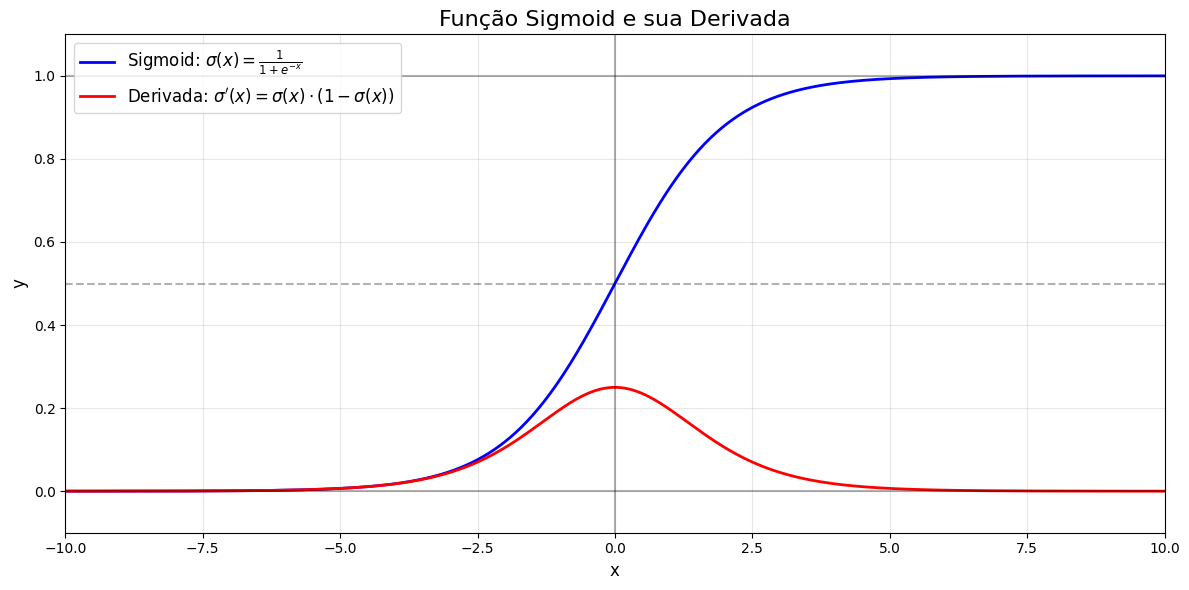

In [2]:
# Implementação da função sigmoid e sua derivada
def sigmoid(x):
    """Função sigmoid"""
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivada da função sigmoid"""
    return sigmoid(x) * (1 - sigmoid(x))

# Visualização da função sigmoid e sua derivada
def plot_sigmoid():
    x = np.linspace(-10, 10, 1000)
    y_sigmoid = sigmoid(x)
    y_derivative = sigmoid_derivative(x)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(x, y_sigmoid, 'b-', linewidth=2, label='Sigmoid: $\sigma(x) = \\frac{1}{1 + e^{-x}}$')
    ax.plot(x, y_derivative, 'r-', linewidth=2, label='Derivada: $\sigma\'(x) = \sigma(x) \\cdot (1 - \sigma(x))$')
    
    # Adicionar linhas de referência
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axhline(y=1, color='k', linestyle='-', alpha=0.3)
    ax.axhline(y=0.5, color='k', linestyle='--', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Configurar o gráfico
    ax.set_xlim(-10, 10)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title('Função Sigmoid e sua Derivada', fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_sigmoid()

### Vantagens e Desvantagens da Sigmoid

#### Vantagens
- Saída limitada entre 0 e 1, o que a torna útil para problemas de classificação binária
- Suave e diferenciável em todo o domínio
- Interpretável como uma probabilidade

#### Desvantagens
- **Problema do gradiente desaparecendo**: Para entradas muito positivas ou muito negativas, o gradiente é próximo de zero, o que pode dificultar o treinamento
- **Saídas não centradas em zero**: A média das saídas não é zero, o que pode causar problemas de convergência
- **Computacionalmente cara**: Envolve operações exponenciais

## Função Tanh (Tangente Hiperbólica)

A função tanh é uma versão escalada da função sigmoid, com saídas no intervalo (-1, 1) em vez de (0, 1).

### Definição Matemática

$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = 2\sigma(2x) - 1$

### Derivada

$\tanh'(x) = 1 - \tanh^2(x)$

### Características

- **Intervalo de saída**: (-1, 1)
- **Suavidade**: Função contínua e diferenciável em todo o domínio
- **Centrada em zero**: A média das saídas é próxima de zero
- **Saturação**: Assim como a sigmoid, também sofre de saturação para entradas extremas

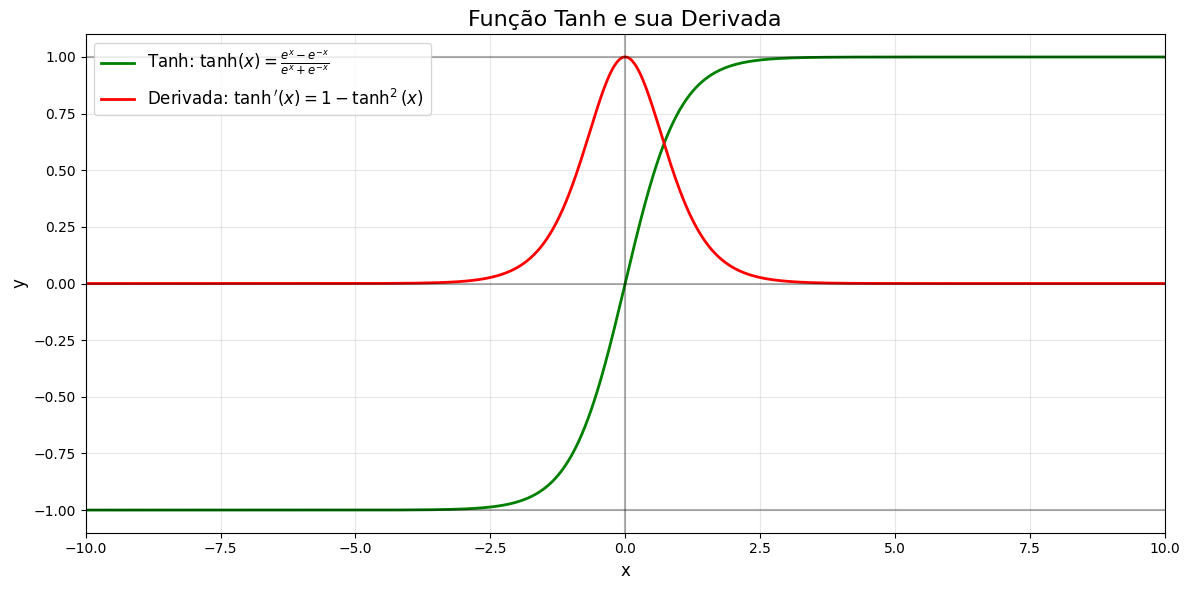

In [3]:
# Implementação da função tanh e sua derivada
def tanh(x):
    """Função tanh"""
    return np.tanh(x)

def tanh_derivative(x):
    """Derivada da função tanh"""
    return 1 - np.tanh(x)**2

# Visualização da função tanh e sua derivada
def plot_tanh():
    x = np.linspace(-10, 10, 1000)
    y_tanh = tanh(x)
    y_derivative = tanh_derivative(x)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(x, y_tanh, 'g-', linewidth=2, label='Tanh: $\\tanh(x) = \\frac{e^x - e^{-x}}{e^x + e^{-x}}$')
    ax.plot(x, y_derivative, 'r-', linewidth=2, label='Derivada: $\\tanh\'(x) = 1 - \\tanh^2(x)$')
    
    # Adicionar linhas de referência
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axhline(y=1, color='k', linestyle='-', alpha=0.3)
    ax.axhline(y=-1, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Configurar o gráfico
    ax.set_xlim(-10, 10)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title('Função Tanh e sua Derivada', fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_tanh()

### Vantagens e Desvantagens da Tanh

#### Vantagens
- Saídas centradas em zero, o que ajuda na convergência durante o treinamento
- Suave e diferenciável em todo o domínio
- Geralmente, tem um desempenho melhor que a sigmoid em redes profundas

#### Desvantagens
- Ainda sofre do problema do gradiente desaparecendo para entradas extremas
- Computacionalmente cara, assim como a sigmoid

## Comparação entre Sigmoid e Tanh

Vamos comparar as funções sigmoid e tanh lado a lado para entender melhor suas diferenças e semelhanças.

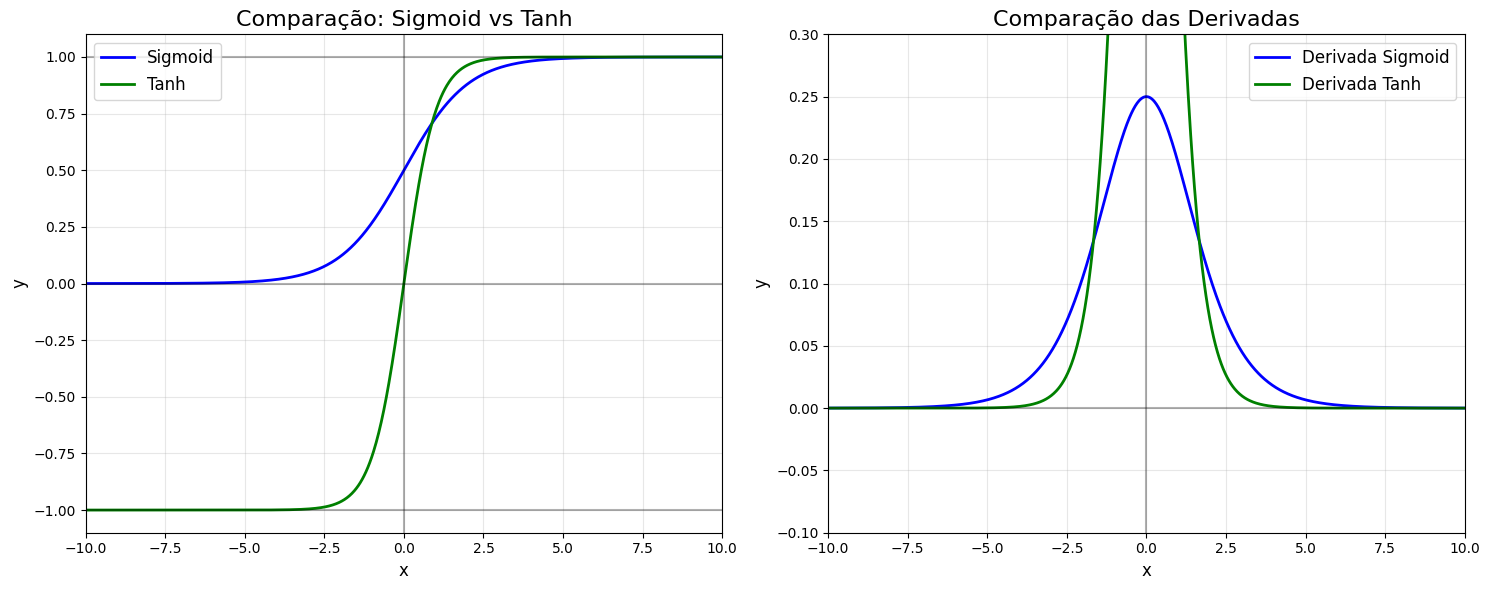

In [4]:
# Comparação entre sigmoid e tanh
def compare_sigmoid_tanh():
    x = np.linspace(-10, 10, 1000)
    y_sigmoid = sigmoid(x)
    y_tanh = tanh(x)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plotar as funções
    ax1.plot(x, y_sigmoid, 'b-', linewidth=2, label='Sigmoid')
    ax1.plot(x, y_tanh, 'g-', linewidth=2, label='Tanh')
    
    # Adicionar linhas de referência
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax1.axhline(y=1, color='k', linestyle='-', alpha=0.3)
    ax1.axhline(y=-1, color='k', linestyle='-', alpha=0.3)
    ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Configurar o primeiro gráfico
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(-1.1, 1.1)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('y', fontsize=12)
    ax1.set_title('Comparação: Sigmoid vs Tanh', fontsize=16)
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Plotar as derivadas
    ax2.plot(x, sigmoid_derivative(x), 'b-', linewidth=2, label='Derivada Sigmoid')
    ax2.plot(x, tanh_derivative(x), 'g-', linewidth=2, label='Derivada Tanh')
    
    # Adicionar linhas de referência
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Configurar o segundo gráfico
    ax2.set_xlim(-10, 10)
    ax2.set_ylim(-0.1, 0.3)
    ax2.set_xlabel('x', fontsize=12)
    ax2.set_ylabel('y', fontsize=12)
    ax2.set_title('Comparação das Derivadas', fontsize=16)
    ax2.legend(fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

compare_sigmoid_tanh()

## Animação do Comportamento durante o Backpropagation

Vamos criar uma animação para visualizar como as funções sigmoid e tanh se comportam durante o processo de backpropagation, especialmente em relação ao problema do gradiente desaparecendo.

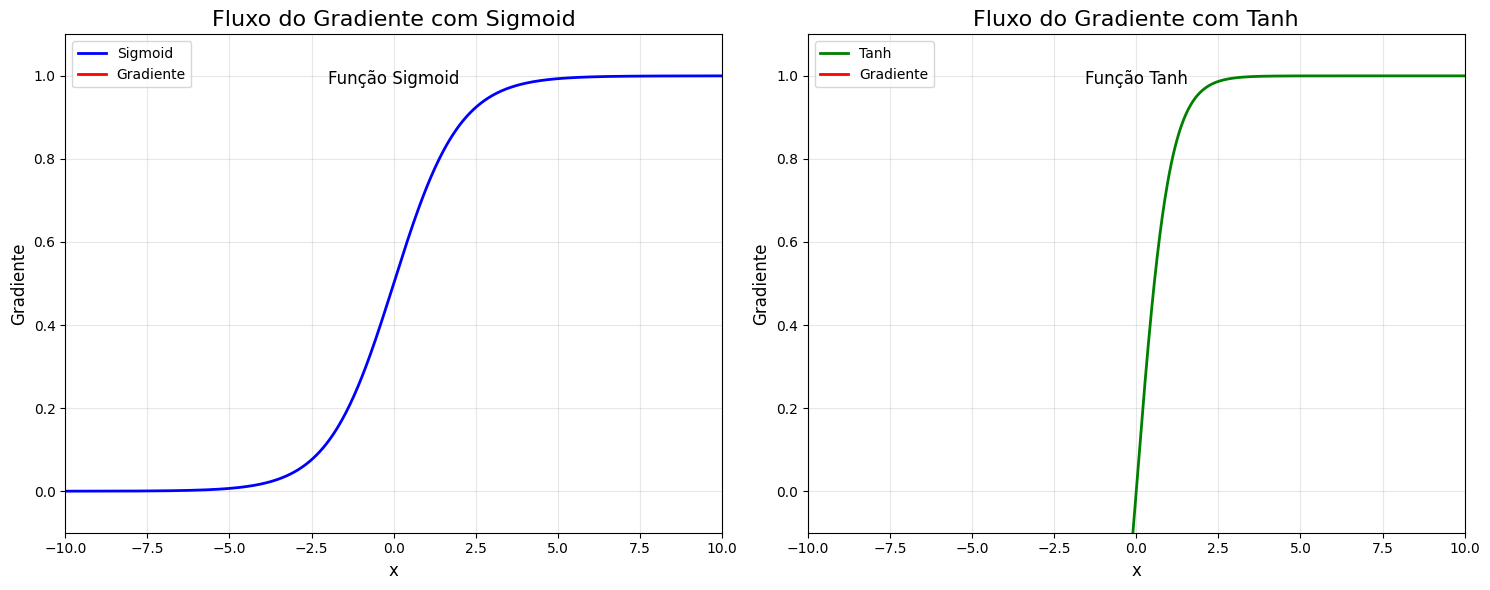

In [5]:
# Animação do comportamento durante o backpropagation
def animate_gradient_flow():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Configurar os eixos
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(-0.1, 1.1)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('Gradiente', fontsize=12)
    ax1.set_title('Fluxo do Gradiente com Sigmoid', fontsize=16)
    ax1.grid(True, alpha=0.3)
    
    ax2.set_xlim(-10, 10)
    ax2.set_ylim(-0.1, 1.1)
    ax2.set_xlabel('x', fontsize=12)
    ax2.set_ylabel('Gradiente', fontsize=12)
    ax2.set_title('Fluxo do Gradiente com Tanh', fontsize=16)
    ax2.grid(True, alpha=0.3)
    
    # Criar dados
    x = np.linspace(-10, 10, 1000)
    
    # Plotar as funções de ativação
    line_sigmoid, = ax1.plot([], [], 'b-', linewidth=2, label='Sigmoid')
    line_sigmoid_grad, = ax1.plot([], [], 'r-', linewidth=2, label='Gradiente')
    
    line_tanh, = ax2.plot([], [], 'g-', linewidth=2, label='Tanh')
    line_tanh_grad, = ax2.plot([], [], 'r-', linewidth=2, label='Gradiente')
    
    # Adicionar legendas
    ax1.legend(fontsize=10)
    ax2.legend(fontsize=10)
    
    # Adicionar texto para camadas
    text_sigmoid = ax1.text(0.5, 0.9, '', transform=ax1.transAxes, ha='center', fontsize=12)
    text_tanh = ax2.text(0.5, 0.9, '', transform=ax2.transAxes, ha='center', fontsize=12)
    
    def init():
        line_sigmoid.set_data([], [])
        line_sigmoid_grad.set_data([], [])
        line_tanh.set_data([], [])
        line_tanh_grad.set_data([], [])
        text_sigmoid.set_text('')
        text_tanh.set_text('')
        return line_sigmoid, line_sigmoid_grad, line_tanh, line_tanh_grad, text_sigmoid, text_tanh
    
    def update(frame):
        # Calcular número de camadas e gradiente acumulado
        num_layers = 10
        current_layer = frame % (num_layers + 1)
        
        if current_layer == 0:
            # Mostrar as funções de ativação
            line_sigmoid.set_data(x, sigmoid(x))
            line_sigmoid_grad.set_data([], [])
            line_tanh.set_data(x, tanh(x))
            line_tanh_grad.set_data([], [])
            text_sigmoid.set_text('Função Sigmoid')
            text_tanh.set_text('Função Tanh')
        else:
            # Mostrar o gradiente acumulado
            grad_sigmoid = sigmoid_derivative(x)
            grad_tanh = tanh_derivative(x)
            
            # Simular a propagação do gradiente através das camadas
            for _ in range(current_layer):
                grad_sigmoid = grad_sigmoid * sigmoid_derivative(x)
                grad_tanh = grad_tanh * tanh_derivative(x)
            
            # Normalizar para visualização
            grad_sigmoid = grad_sigmoid / np.max(grad_sigmoid) if np.max(grad_sigmoid) > 0 else grad_sigmoid
            grad_tanh = grad_tanh / np.max(grad_tanh) if np.max(grad_tanh) > 0 else grad_tanh
            
            line_sigmoid.set_data(x, sigmoid(x))
            line_sigmoid_grad.set_data(x, grad_sigmoid)
            line_tanh.set_data(x, tanh(x))
            line_tanh_grad.set_data(x, grad_tanh)
            text_sigmoid.set_text(f'Camada {current_layer} de {num_layers}')
            text_tanh.set_text(f'Camada {current_layer} de {num_layers}')
        
        return line_sigmoid, line_sigmoid_grad, line_tanh, line_tanh_grad, text_sigmoid, text_tanh
    
    ani = FuncAnimation(fig, update, frames=12, init_func=init, blit=True, interval=1000)
    plt.tight_layout()
    return HTML(ani.to_jshtml())

animate_gradient_flow()